# Unsupervised Learning | Clustering (K-Means)

Today's Outline:
- Intuition
- Full Case-study

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

==========

## Labeled vs. Unlabeled Data

### Labeled Data

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True)
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Unlabeled Data

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
iris_df.dropna(how="all", inplace=True)
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


==========

## K-Means Clustering | Intuition (Blobs)

Scikit-Learn Clustering Module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

Visualizing K-Means Clustering: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

### Creating Data

In [4]:
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8,random_state=101)

### Exploring Data

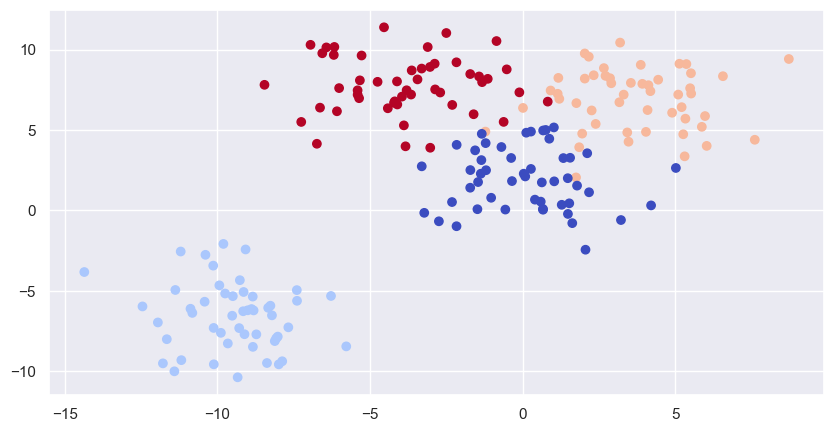

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='coolwarm')

### Model Training & Predicting

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(5)

In [9]:
kmeans.fit(data[0])

c:\Users\Amr Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [10]:
kmeans.cluster_centers_

array([[ 4.3172263 ,  7.04477898],
       [-9.46941837, -6.56081545],
       [-0.35257338,  5.89020711],
       [ 0.14363806,  1.2030127 ],
       [-4.64125855,  8.09404675]])

In [11]:
kmeans.labels_

array([4, 0, 3, 0, 0, 1, 0, 3, 2, 3, 4, 3, 0, 0, 4, 3, 0, 3, 1, 4, 1, 3,
       3, 1, 4, 1, 1, 3, 0, 0, 4, 1, 0, 3, 3, 4, 1, 1, 1, 3, 1, 4, 2, 4,
       3, 2, 4, 3, 1, 2, 3, 4, 0, 3, 1, 2, 2, 3, 4, 0, 1, 2, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 3, 4, 3, 2, 1, 0, 1, 3, 3, 3, 4,
       2, 1, 1, 1, 1, 2, 2, 1, 0, 4, 1, 0, 2, 1, 3, 3, 2, 2, 1, 0, 1, 1,
       0, 4, 4, 0, 1, 0, 4, 4, 2, 2, 2, 4, 3, 4, 3, 0, 4, 3, 1, 2, 4, 4,
       3, 1, 1, 4, 0, 2, 0, 3, 1, 0, 1, 2, 2, 0, 2, 1, 4, 4, 4, 4, 3, 0,
       3, 4, 2, 0, 0, 3, 0, 3, 2, 4, 1, 4, 3, 0, 4, 3, 0, 3, 4, 2, 2, 4,
       0, 2, 1, 2, 4, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 0, 0, 4, 1, 2, 0, 0,
       1, 3])

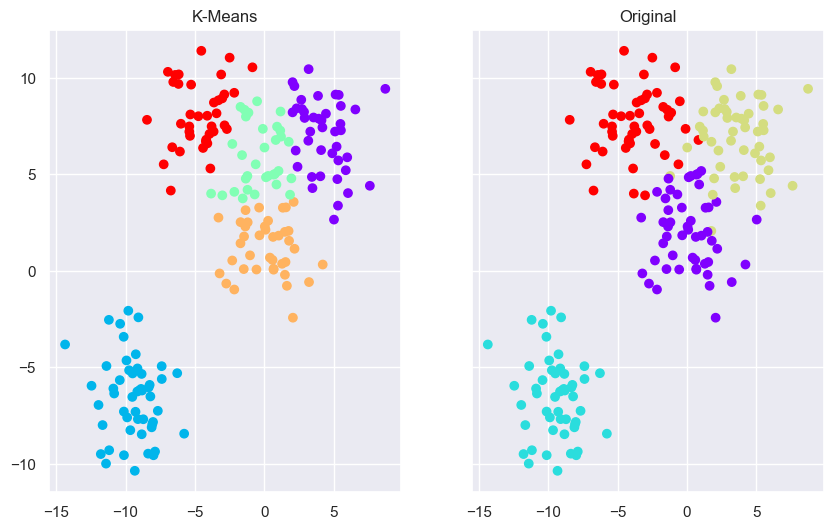

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K-Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

==========

## K-Means Clustering | Full Case-study (Mall Customers)

### Importing Dataset

In [13]:
mall = pd.read_csv('data/mall-customers.csv')
mall

FileNotFoundError: [Errno 2] No such file or directory: 'data/mall-customers.csv'

### Extracting Features

In [ ]:
X = mall.iloc[:, [3, 4]].values
X

### Exploring Data

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.title('Mall Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Model Training & Prediction

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [ ]:
kmeans.fit(X)

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.inertia_

In [ ]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

In [ ]:
mall_clustered = mall.copy()
mall_clustered['Clusters'] = y_kmeans
mall_clustered

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title('Mall Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Finding the Optimal Number of Clusters (Elbow / Knee Method)

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Final Model

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising Clusters

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'k')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

==========

# THANK YOU!